<a href="https://colab.research.google.com/github/shwetabhosale15/shweta/blob/main/Project_for_Placements_Classification_algorithms_decision_tree_SVM_Random_forest_Navie_Bayes_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Project**

#Problem Statement
Social media advertising is a type of digital marketing that utilizes social networks such as Facebook, Twitter, and Instagram to deliver paid ads to your target audience. Social media ads are a quick and effective way to connect with your consumers and boost your marketing campaigns.using Social media adv companys clearly defined goal a  high-quality, relevant small target audience. 

**For example**, using social platform like facebook whatsup etc. we know about friend has highly rated a restaurant, or watched a particular film , Company marketing their product.

**Problem :**
which machine learning model help in advertising &marketing to detect signals and get the right ad in front of the right person, at the right time ?
Company find out answers that's like question,collect the correct insight from their company's data and from Data analysis ,machine learning model help them for growth of profits. 

Given this background, they decide to hire you as the data Scientist or ML Engineer and come up with a strategy to fulfill the company's business objective.

Understand the Business Problem.
Collecting Data & Clean the data.
Preparing the Data: You are expected to do an exhaustive EDA .
Explore the insights which are invisible in Data (all dimensions).
Choosing a Model
Training the Model
MAchine Learning Algorithms impliment for model
Making Predictions


#**Import** **Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Read the data**

In [2]:
dataset=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
dataset.shape

(400, 5)

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


#**Check for unique values**

In [6]:
dataset.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

# **Check for duplicate values**

In [7]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

#**Check for missing values**

In [8]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#Also we findout nunique values,duplicated values,missing values using info() function.

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


#**Co-relation**

In [10]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [13]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

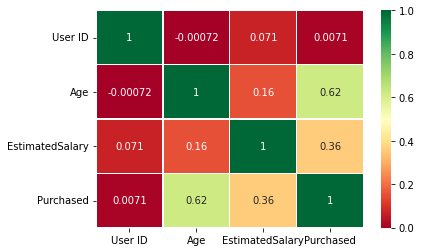

In [14]:
cols=['User ID','Gender','Age','EstimatedSalary','Purchased']

sns.heatmap(dataset[cols].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

We identified the company profit are depend on purchased col,In the above heatmap its clear that Columns User Id and Age are not correalated with Purchased column.

#**Clean Data-Drop Cols**

In [15]:
dataset.drop(['User ID','Gender'],axis=1,inplace=True)

In [16]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#**Exploratory Data Analysis (EDA)**

#Univariate Analysis

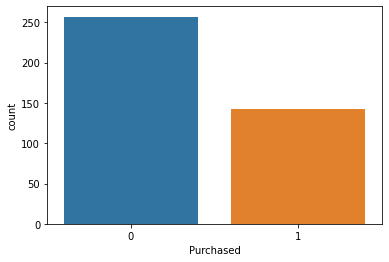

In [17]:
sns.countplot(x='Purchased',data=dataset)

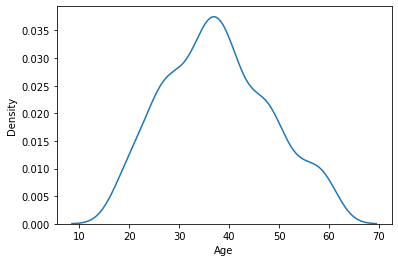

In [18]:
sns.kdeplot(x='Age',data=dataset)

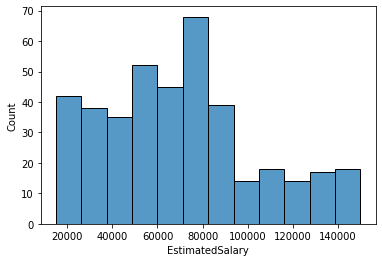

In [19]:
sns.histplot(x='EstimatedSalary',data=dataset)

#**Outlier Detection**

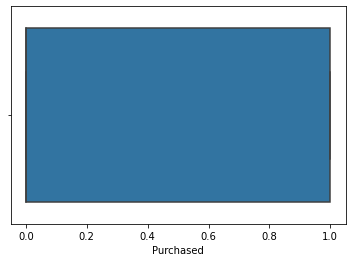

In [20]:
sns.boxplot(x='Purchased',data=dataset)

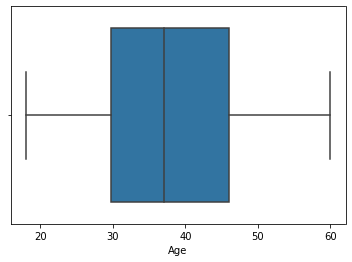

In [21]:
sns.boxplot(x='Age',data=dataset)

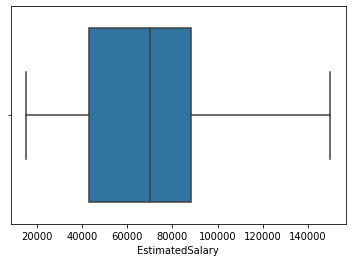

In [22]:
sns.boxplot(x='EstimatedSalary',data=dataset)

#**Bivarite Analysis**

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


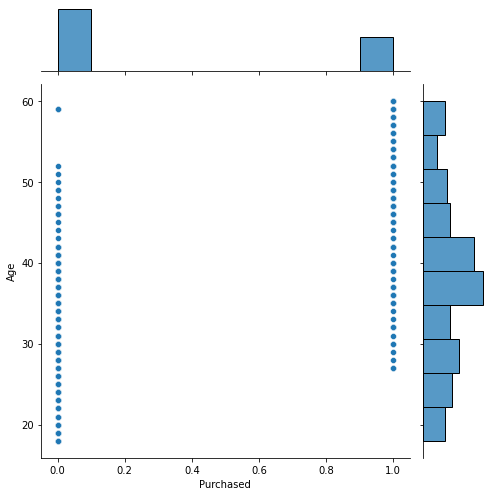

In [23]:
sns.jointplot(x='Purchased', y='Age',data=dataset,size=7, kind='scatter')

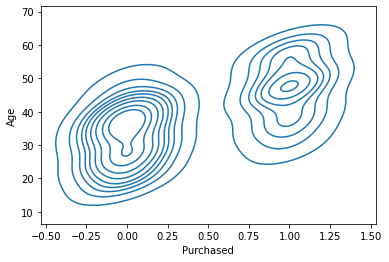

In [24]:
sns.kdeplot(x='Purchased', y='Age',data=dataset)

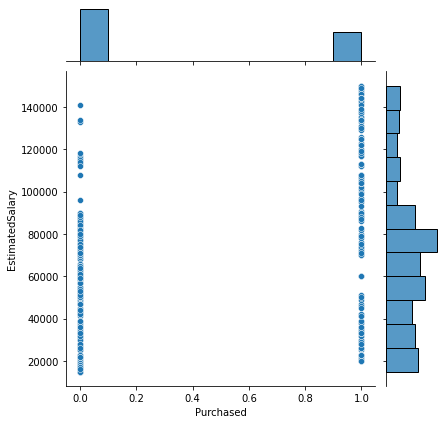

In [25]:
sns.jointplot(x='Purchased', y='EstimatedSalary',data=dataset)

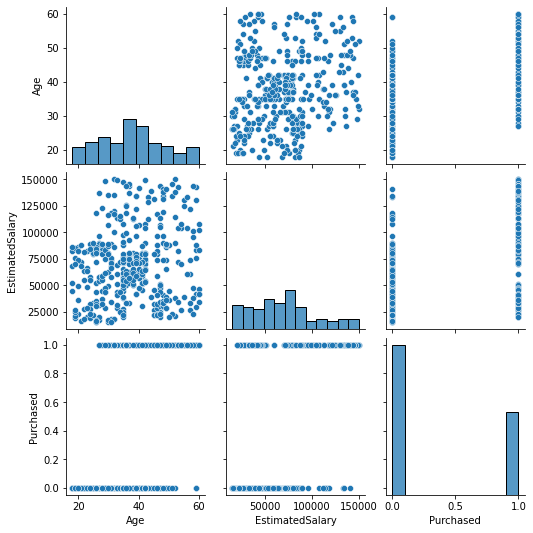

In [26]:
sns.pairplot(dataset)

#**Standarize the varibale**

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [29]:
scaler.fit(dataset.drop('Purchased',axis=1))

StandardScaler()

In [30]:
scaler_features=scaler.transform(dataset.drop('Purchased',axis=1))

In [31]:
scaler_features

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [32]:
standardized_dataset=pd.DataFrame(scaler_features,columns=['Age','EnstimatedSalary'])

In [33]:
standardized_dataset

,Age,EnstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


#**Traning model**

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(standardized_dataset,dataset['Purchased'],test_size=0.30,random_state=101)

In [38]:
x_train.shape

(280, 2)

In [39]:
x_test.shape

(120, 2)

In [40]:
y_test.shape

(120,)

In [41]:
y_train.shape

(280,)

We use the different machine learning classification alogrithms and then observe which algorithm accuracy are best for our model.

#Decision Tree Algorithm

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
DTC=DecisionTreeClassifier()

In [44]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
pred=DTC.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
print(confusion_matrix(y_test,pred))

[[72  8]
 [ 6 34]]


In [48]:
70+35/120*100

99.16666666666667

#**support vector machine SVM-Algorithm**

social_network data used for this model...upto train_test_split step are same ..before that below step follow

In [49]:
from sklearn.svm import SVC

In [50]:
classifier=SVC()

In [51]:
classifier.fit(x_train,y_train)

SVC()

In [52]:
pred=classifier.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [54]:
acc=accuracy_score(y_test,pred)

In [55]:
acc

0.9333333333333333

In [56]:
acc*100

93.33333333333333

In [57]:
print(confusion_matrix(y_test,pred))

[[73  7]
 [ 1 39]]


In [58]:
(73+39)/120*100

93.33333333333333

#**Random forest Algorithm**

social_network data used for this model...upto train_test_split step are same ..before that below step run

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rfc=RandomForestClassifier(n_estimators=100)

In [87]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [88]:
rfc.pred=rfc.predict(x_test)

In [89]:
print(confusion_matrix(y_test,rfc.pred))

[[72  8]
 [ 2 38]]


In [91]:
(72+38)/120*100

91.66666666666666

**Elbow method:-** It is used by using this method we will get the error rate for different values of k. using average of true & predicted values.

In [66]:
err_rate=[]

In [67]:
for i in range(1,100):
  rfc=RandomForestClassifier(n_estimators=i)
  rfc.fit(x_train,y_train)
  rfc.pred=rfc.predict(x_test)
  err_rate.append(np.mean(rfc.pred !=y_test))

In [77]:
err_rate

[0.06666666666666667,
 0.15,
 0.125,
 0.125,
 0.1,
 0.11666666666666667,
 0.11666666666666667,
 0.11666666666666667,
 0.1,
 0.075,
 0.1,
 0.08333333333333333,
 0.08333333333333333,
 0.09166666666666666,
 0.09166666666666666,
 0.09166666666666666,
 0.10833333333333334,
 0.1,
 0.1,
 0.08333333333333333,
 0.09166666666666666,
 0.09166666666666666,
 0.10833333333333334,
 0.09166666666666666,
 0.1,
 0.1,
 0.08333333333333333,
 0.1,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.09166666666666666,
 0.1,
 0.09166666666666666,
 0.1,
 0.09166666666666666,
 0.1,
 0.09166666666666666,
 0.09166666666666666,
 0.09166666666666666,
 0.1,
 0.075,
 0.10833333333333334,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.09166666666666666,
 0.08333333333333333,
 0.1,
 0.09166666666666666,
 0.1,
 0.1,
 0.09166666666666666,
 0.08333333333333333,
 0.10833333333333334,
 0.08333333333333333,
 0.08333333333333333,
 0.1,
 0.1,
 0.1,
 0.075,
 0.1,
 0.

Text(0, 0.5, 'err_rate')

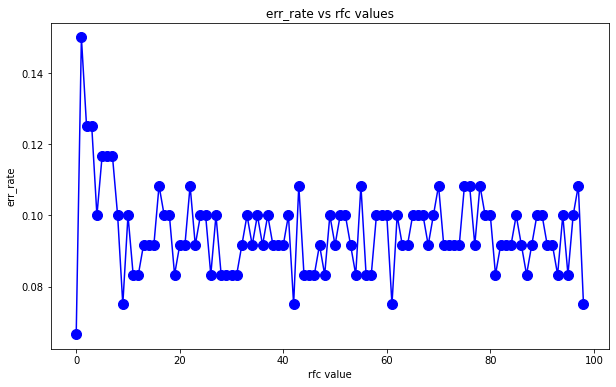

In [78]:
plt.figure(figsize=(10,6))
plt.plot(range(0,99),err_rate,color='b',marker='o',markersize=10)
plt.title('err_rate vs rfc values')
plt.xlabel('rfc value')
plt.ylabel('err_rate')

#**Naive Bayes Algorithm**

social_network data used for this model...upto train_test_split step are same ..before that below step run

In [92]:
from sklearn.naive_bayes import GaussianNB

In [94]:
GNB=GaussianNB()

In [95]:
GNB.fit(x_train,y_train)

GaussianNB()

In [96]:
y_pred=GNB.predict(x_test)

In [97]:
acc=accuracy_score(y_test,y_pred)

In [98]:
acc

0.9083333333333333

In [99]:
acc*100

90.83333333333333

#**Steps :-**
1) I was collect the Social networks adv. dataset.

2) Understood the Business Problem. Read the Data,check nunique,duplicated ,missing values.

3) Cleaned the data drop unwanted colums from dataset. 

4) Prepared the Data: Exploratory Data Analysis EDA .
in this EDA I performed univariate analysis, Bivariate analysis,outlier detection,Explored the insights which are invisible in Data after performed on EDA, 
  I got information like Ratio of Purchased-purchased count values is less,Age between 20 to 55 person used the social media platforms most, Most of user's salary between 20k to 55k . 

5) I converted the data into Stanadarize variables.

6)Built a Model Training the Model Machine Learning Algorithms impliment for model Making Predictions.


#**Conclusion :-**
I Build & performed on verious Classification model (Decision Tree ,support vector machine SVM,Random forest ,Naive Bayes) and comapared models one another other then 

I found  the Decision Tree Algorithm model are predict best accuracy 99.16 this machine learning model help in advertising &marketing to detect signals and got the right ad in front of the right person, at the right time.